In [ ]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()
# doornumber sai do day la so nhung lai lu dang chu
# cylindernumber sai do day la so nhung lai lu dang chu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()
# Price
# mean = 13276.710571 -> gia trung binh la 13276.710571
# std = 7988.852332
  # -> Muc do chenh lech ve gia cua cac san pham so voi gia trung binh la 7988.852332
  # -> Lech: phan bo ve gia cua cac san pham dang khong deu (cai gia qua cao, cai gia qua thap)
  # -> Doan la du lieu co outliner
  # co san pham co gia tri rat lon so voi phan con lai
# min = 5118 -> gia thap nhat la 5118
# 25% (Q1) = 7788 -> 25% cac san pham co gia tri nho hon hoac bang 7788
# 50% (Q2, median) = 10295 -> 50% cac san pham co gia tri nho hon hoac bang 10295
# 75% = 16503 -> 75% cac san pham co gia tri nho hon hoac bang 16503
# max = 45400 -> gia cao nhat la 45400

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df[['doornumber', 'cylindernumber']].head()

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


Tim moi quan he giua hang xe va ten xe

In [ ]:
#Ten hang xe
df['CarName'].str.split(' ')

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [ ]:
df['HangXe'] = df['CarName'].str.split(' ').str[0]
df['HangXe'].tolist()

['alfa-romero',
 'alfa-romero',
 'alfa-romero',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'isuzu',
 'isuzu',
 'isuzu',
 'isuzu',
 'jaguar',
 'jaguar',
 'jaguar',
 'maxda',
 'maxda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'mercury',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'Nissan',
 'nissan',
 'nissan',


In [ ]:
#Ep chu thanh so
mapping_order = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12}
df['number_door'] = df['doornumber'].map(mapping_order)
pd.get_dummies(df['number_door'], dtype=int)
df['number_cyl'] = df['cylindernumber'].map(mapping_order)
pd.get_dummies(df['number_cyl'], dtype=int)
df[['number_door','number_cyl']].head()

,number_door,number_cyl
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


Tien hanh phan tich moi quan he cua tung thuoc tinh

In [ ]:
#group gia theo hang xe, tinh trung binh gia cung cua hang
tbgiahangxe = df.groupby('HangXe')['price'].mean()
tbgiahangxe

HangXe
Nissan          5499.000000
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
maxda           5645.000000
mazda          11320.600000
mercury        16503.000000
mitsubishi      9239.769231
nissan         10704.882353
peugeot        15489.090909
plymouth        7963.428571
porcshce       32528.000000
porsche        31118.625000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9696.645161
toyouta        15750.000000
vokswagen       7775.000000
volkswagen     10175.555556
volvo          18063.181818
vw             10787.500000
Name: price, dtype: float64

<Axes: xlabel='carlength', ylabel='price'>

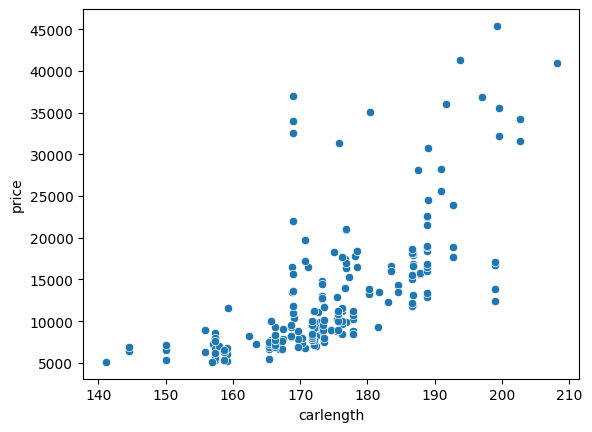

In [ ]:
# carlength vs price
sns.scatterplot(df, x='carlength', y='price')

<Axes: xlabel='fueltype', ylabel='price'>

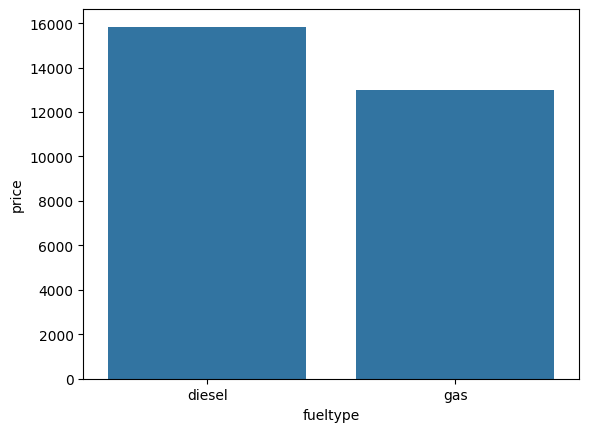

In [ ]:
# fueltype vs price
# tinh price trung binh theo fueltype
fueltype_price = df.groupby('fueltype')['price'].mean().reset_index()
# ve
sns.barplot(fueltype_price, x='fueltype', y='price')


<Axes: xlabel='number_door', ylabel='price'>

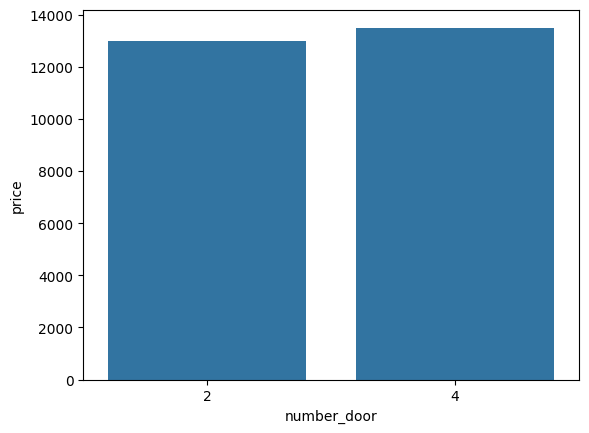

In [ ]:
# doornumber vs price
# tinh price trung binh theo doornumber
doornumber_price = df.groupby('number_door')['price'].mean().reset_index()
# ve
sns.barplot(doornumber_price, x='number_door', y='price')

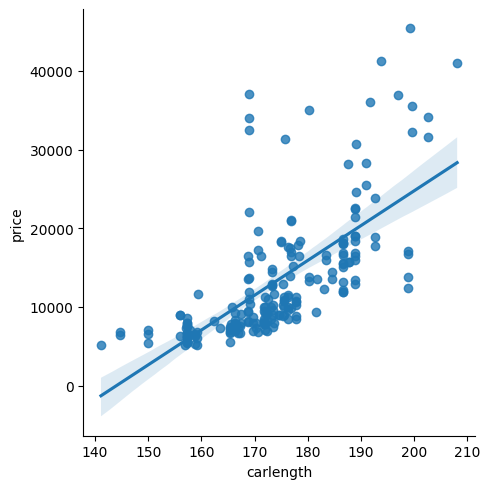

In [ ]:
# chieu dai xe: carlength vs price
sns.lmplot(df, x='carlength', y='price')

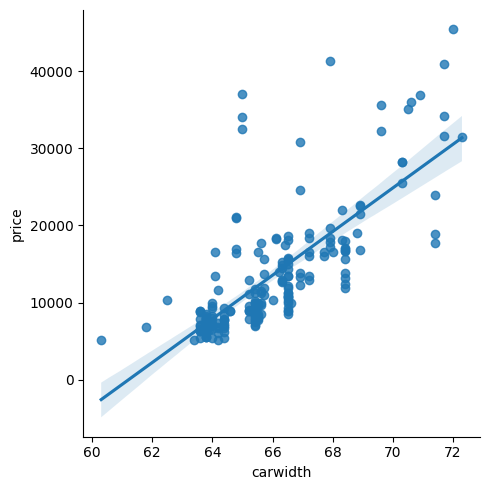

In [ ]:
# chieu rong xe: carwidth vs price
sns.lmplot(df, x='carwidth', y='price')

In [ ]:
# Tu nhung bieu do tren co the suy ra chieu dai xe, chieu rong xe, so cua xe cang lon thi gia cang cao nguoc lai cang nho gia cang thap

Nhan xe thuoc tinh gay anh huong toi gia


In [ ]:
#Xem xet co nhung bien nao tuong quan lon voi nhau chi giu lai 1 trong cac bien do dua vao mo hinh
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'HangXe', 'number_door', 'number_cyl'],
      dtype='object')

<Axes: >

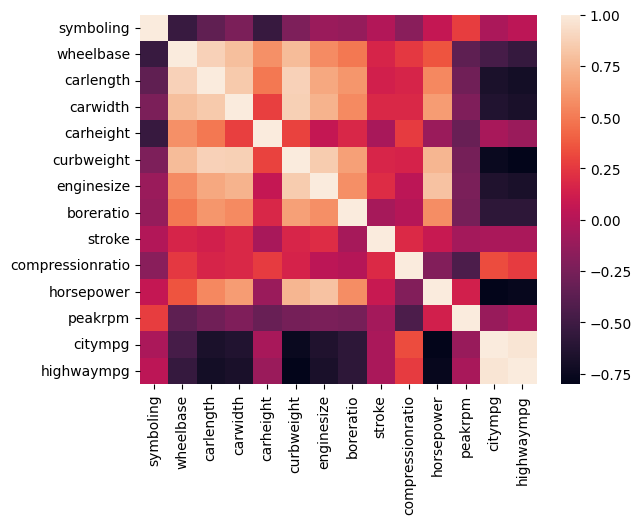

In [ ]:
#tinh tuong quan
#heatmap
sns.heatmap(df[['symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']].corr())

Tien hanh ma hoa tao ra cac bien dumy tu cac bien category (thang doi norminal) ban dau


In [74]:
pd.get_dummies(df, columns=['fueltype','CarName','fueltype','aspiration','carbody','enginetype'], dtype='int')

,car_ID,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,two,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,2,3,two,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,3,1,two,rwd,front,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,0,1,0
3,4,2,four,fwd,front,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,1,0,0,0
4,5,2,four,4wd,front,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,four,rwd,front,109.1,188.8,68.9,55.5,2952,...,0,1,0,0,0,0,1,0,0,0
201,202,-1,four,rwd,front,109.1,188.8,68.8,55.5,3049,...,0,1,0,0,0,0,1,0,0,0
202,203,-1,four,rwd,front,109.1,188.8,68.9,55.5,3012,...,0,1,0,0,0,0,0,0,1,0
203,204,-1,four,rwd,front,109.1,188.8,68.9,55.5,3217,...,0,1,0,0,0,0,1,0,0,0


Xay dung mo hinh hoi quy tuyen tinh bang thu bien sklearn

In [75]:
y = df['price']
X = df.drop(['price'], axis=1)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape

(164, 28)

In [85]:
y_train.shape

(164,)

In [91]:
X_test.shape

(41, 28)

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Danh gia ket qua mo hinh

In [93]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
y_pred = lr.fit(X_train, y_train).predict(X_test)

ValueError: could not convert string to float: 'mazda rx-7 gs'